# Unsupervised Learning Predict (Team_JM1_#Awesome) Solution

© Explore Data Science Academy

---
### Honour Code

We { **MICHAEL OKEREAFOR, AYOOLA SOLANKE, RAHEEMAT ADETUNJI** }, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

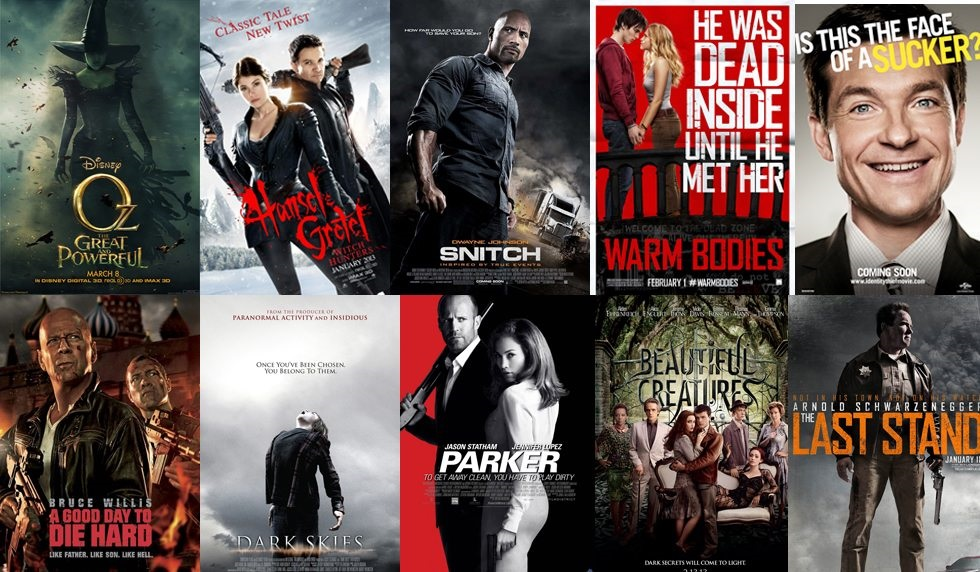

## Predict Overview: Movie Recommendation System 2022

In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

EDSA is challenging us during this Unsupervised Learning Sprint with the following tasks; 

- construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.


Recommender Systems are a type of information filtering system as they improve the quality of search results and provides items that are more relevant to the search item or are related to the search history of the user.  

Almost every major tech company has applied recommender systems in some form: Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay and Facebook uses it to recommend pages to like and people to follow. Furthermore, companies like Netflix and Spotify depend on the effectiveness of their recommendation engines for the success of their business.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>     

<a href=#eight>8. Conclusion</a>

## Problem statement
Thousands of movies are produced and released every year by different countries.      
Many viewers find it tedious to inspect or select great movies that suits their preference from these numerous released movies; therefore, majority of these movies are left unexplored. 

Following consultation, we(*Awesome DataScientists*) agreed to construct an algorithm that will accurately rate and recommend unseen movies for movie lovers based on their historical choices.

In [1]:
import os
os.environ["COMET_URL_OVERRIDE"] = "https://www.comet.com/clientlib/"

from comet_ml import Experiment

In [2]:
experiment = Experiment(
    api_key="ROjbHRdIYvME1efnooXTYhCeg",
    project_name="unsupervised-learning-predict-project",
    workspace="chuqudee",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.com/chuqudee/unsupervised-learning-predict-project/832622a317fa4c239db575636f8ec4fa



 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


### 1.1 Packages to be Imported and their uses
The following Packages/Libraries will be imported and used in this project work:

- Numpy: For arrays, algebra and Mathematical Calculations.
- Pandas: For Dataframe Manipulation and Statistical calculations such as mean.
- Matplotlib: For ploting normal charts and graphs.
- Seaborn: For scatterplots.
- Plotly: For producing interactive publication-quality graphs.
- Sklearn:  For text conversion and similarity computation.
- Suprise: For Unsupervised Model Building
- Garbage Collector (GC): To help free up memory space
- Pickle: To export or save our model for later predictions.

In [3]:
# Data manipulation
import numpy as np 
import pandas as pd   
import re

# Data visualization
import matplotlib
import seaborn as sns 
import matplotlib.pyplot as plt 
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Style
import matplotlib.style as style 
sns.set(font_scale=1.5)
style.use('seaborn-pastel')
sns.set(style="whitegrid")
sns.set_style("dark")

# Libraries used during sorting procedures.
import operator # <-- Convienient item retrieval during iteration 
import heapq # <-- Efficient sorting of large lists

# Building recommender systems
from sklearn.metrics.pairwise import cosine_similarity
import gensim
from gensim.matutils import softcossim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.stats import pearsonr
from sklearn.cluster import KMeans

# For Unsupervised Model Building
import surprise
from surprise import Reader, Dataset, SVD
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# Import time to measure algorithm runtime 
from time import time
from datetime import datetime

# Turn off or ignore minor warnings that may pop-up while executing codes.
import warnings 
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Garbage Collector
import gc

COMET INFO: Couldn't find a Git repository in 'C:\\Users\\PANDORA' nor in any parent directory. You can override where Comet is looking for a Git Patch by setting the configuration `COMET_GIT_DIRECTORY`


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



### Movies Dataset from MovieLens Database and IMDB

We have been supplied with about 7 csv files. They generally consists of informations of movies and several million 5-star ratings obtained from users of the online MovieLens movie recommendation service.

- genome_scores.csv - a score mapping the strength between movies and tag-related properties. Read more here
- genome_tags.csv - user assigned tags for genome-related scores
- imdb_data.csv - Additional movie metadata scraped from IMDB using the links.csv file.
- links.csv - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- tags.csv - User assigned for the movies within the dataset.
- test.csv - The test split of the dataset. Contains user and movie IDs with no rating data.
- train.csv - The training split of the dataset. Contains user and movie IDs with associated rating data.

So lets get started with our project!

In [4]:
# Loading our datasets
movies_df = pd.read_csv('ul_predict_csvs/movies.csv')
movies_df.tail()

movieId                           title                  genres
62418   209157                       We (2018)                   Drama
62419   209159       Window of the Soul (2001)             Documentary
62420   209163                Bad Poems (2018)            Comedy|Drama
62421   209169             A Girl Thing (2001)      (no genres listed)
62422   209171  Women of Devil's Island (1962)  Action|Adventure|Drama

In [5]:
imdb_df = pd.read_csv('ul_predict_csvs/imdb_data.csv')
imdb_df.head()

movieId                                         title_cast  \
0        1  Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...   
1        2  Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...   
2        3  Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...   
3        4  Whitney Houston|Angela Bassett|Loretta Devine|...   
4        5  Steve Martin|Diane Keaton|Martin Short|Kimberl...   

              director  runtime       budget  \
0        John Lasseter     81.0  $30,000,000   
1   Jonathan Hensleigh    104.0  $65,000,000   
2  Mark Steven Johnson    101.0  $25,000,000   
3       Terry McMillan    124.0  $16,000,000   
4       Albert Hackett    106.0  $30,000,000   

                                       plot_keywords  
0                   toy|rivalry|cowboy|cgi animation  
1                   board game|adventurer|fight|game  
2                         boat|lake|neighbor|rivalry  
3  black american|husband wife relationship|betra...  
4                    fatherhood|doberman|dog|mansion

In [6]:
tags_df = pd.read_csv('ul_predict_csvs/tags.csv')
tags_df.tail()

userId  movieId                  tag   timestamp
1093355  162521    66934  Neil Patrick Harris  1427311611
1093356  162521   103341     cornetto trilogy  1427311259
1093357  162534   189169               comedy  1527518175
1093358  162534   189169             disabled  1527518181
1093359  162534   189169              robbery  1527518193

In [7]:
genomescores_df = pd.read_csv('ul_predict_csvs/genome_scores.csv')
genomescores_df.tail()

movieId  tagId  relevance
15584443   206499   1124    0.11000
15584444   206499   1125    0.04850
15584445   206499   1126    0.01325
15584446   206499   1127    0.14025
15584447   206499   1128    0.03350

In [8]:
genometags_df = pd.read_csv('ul_predict_csvs/genome_tags.csv')
genometags_df.tail()

tagId      tag
1123   1124  writing
1124   1125    wuxia
1125   1126     wwii
1126   1127   zombie
1127   1128  zombies

In [9]:
train_df = pd.read_csv('ul_predict_csvs/train.csv')
train_df.head()

userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

In [10]:
train_df.info()
#checking the shape
k, l = train_df.shape
print(f'train_df contains {k} rows and {l} columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB
train_df contains 10000038 rows and 4 columns


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


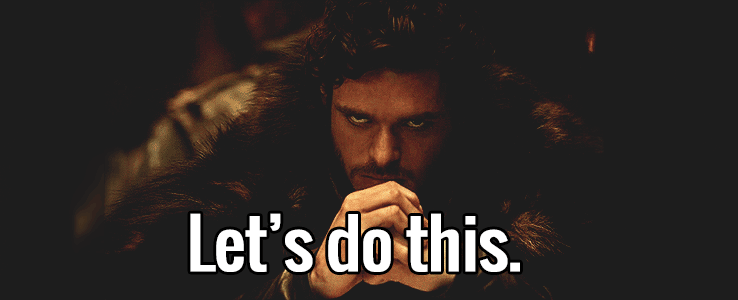

In this section, we will perform some indepth analysis on our datasets with the use of visualizations.

We will also look at ratings distribution of the data which will be illustrated using graphs.

First, Let us confirm the sizes of the datasets we are dealing with.

In [11]:
# Check the shape/sizes of the data sets
"""" 
Creating a DataFrame which tells the shape of each of our datasets
"""

# List Names of Data sets
Df_names = ['Movies Data', 'IMDB Data', 'Tags Data', 'Genome_Scores Data', 'Genome_Tags Data', 'Train Data', ]
# Generate a list of each data size
observations = [movies_df.shape[0], imdb_df.shape[0], tags_df.shape[0], 
                genomescores_df.shape[0], genometags_df.shape[0], train_df.shape[0]]
columns = [movies_df.shape[1], imdb_df.shape[1], tags_df.shape[1], 
           genomescores_df.shape[1], genometags_df.shape[1], train_df.shape[1]]

# Place & view result in Pandas DataFrame
size_df = pd.DataFrame(list(zip(Df_names, observations, columns)), columns=['Dataframe', 'Observations', 'Columns'])
size_df

Dataframe  Observations  Columns
0         Movies Data         62423        3
1           IMDB Data         27278        6
2           Tags Data       1093360        4
3  Genome_Scores Data      15584448        3
4    Genome_Tags Data          1128        2
5          Train Data      10000038        4

**What do we observe here?**    
Each of these datasetas have different number of observations. But these datasets can however be related to one another with the `movieId` feature which is found on all the datasets.     

There are 10 million+ observations for training & validation (which could be a problem for systems with low computing power) which is a BIG DATA and this is a whole lot of Dataset to manipulate through.

Genome_Scores Data, which is a score mapping the strength between movies and tag-related properties being over 15 Million in size.

`timestamp` column can be found in `tags_df` and `train_df` which isn't particularly useful for our recommendation algorithm building and the time a movie was being rated nothing to do with a user's preferences or the quality of a film. BUT, the timestamps could, however, provide some meaningful insights in our EDA.

We may have to reduce the dimesionality of the dataset along the way.

**Calculating our total number of users:** since the `train_df` has the highest number of observations, lets us use it to calculate our total number of users.

In [12]:
unique_users = len(train_df['userId'].unique().tolist())
print(f'The total number of users are {unique_users}')

The total number of users are 162541


In [13]:
unique_users = len(train_df['movieId'].unique().tolist())
print(f'The total number of movies are {unique_users}')

The total number of movies are 48213


Checking the lowest and highest ratings received.

In [14]:
# minimum and maximum ratings
min_rating = train_df.rating.min()
max_rating = train_df.rating.max()
print('Lowest rating: {}'.format(min_rating))
print('Highest rating: {}'.format(max_rating))

Lowest rating: 0.5
Highest rating: 5.0


Lets take a look at the distribution of these ratings.

In [15]:
# Creating a class distribution in a dataframe
ratings_dist = pd.DataFrame(list(train_df['rating'].value_counts()),
                          index=train_df['rating'].unique(),
                          columns=['Rating count'])

ratings_dist

Rating count
4.0       2652977
4.5       1959759
5.0       1445230
2.0       1270642
3.0        880516
1.0        656821
3.5        505578
2.5        311213
0.5        159731
1.5        157571

C:\Users\PANDORA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


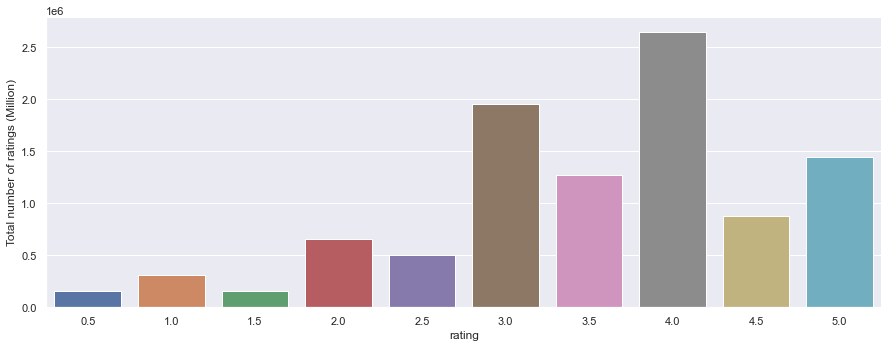

In [16]:
# Let's Visualise the Distribution of Rating in our Actual Train Data
with sns.axes_style('darkgrid'):
    g = sns.catplot("rating", data=train_df, aspect=2.5, kind='count')
    g.set_ylabels("Total number of ratings (Million)");

In [17]:
print (f'Total Number of ratings in train_df: {train_df.shape[0]}')
print (f'Average rating in train_df: {np.mean(train_df["rating"])}')

Total Number of ratings in train_df: 10000038
Average rating in train_df: 3.5333951730983424


Lets clean up the `movies_df` features.

In [18]:
# Convert data types to strings for string handling
movies_df['title'] = movies_df.title.astype(str)
movies_df['genres'] = movies_df.genres.astype(str)

# Discarding the pipes between the genres 
movies_df['genres'] = movies_df['genres'].map(lambda x: x.lower().split('|'))
movies_df['genres'] = movies_df['genres'].apply(lambda x: " ".join(x))

# Extracting the release year from the titles
def get_release_dates(title):
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

# Creating the release year by extracting the release year from the movie title
movies_df['release_year'] = movies_df['title'].apply(get_release_dates)

# removing the year from the titles
#movies_df['title'] = movies_df['title'].map(lambda x: str(x)[:-6])

In [19]:
movies_df.head()

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  release_year  
0  adventure animation children comedy fantasy          1995  
1                   adventure children fantasy          1995  
2                               comedy romance          1995  
3                         comedy drama romance          1995  
4                                       comedy          1995

For easy analysis of our data, we will merge the train dataframe with the movies dataframe based on the `movieId`.

In [20]:
# adding movie titles and genres to train_df
train_df = train_df.merge(movies_df[['movieId', 'title', 'genres']], on='movieId', how='left')

In [21]:
train_df.head()

userId  movieId  rating   timestamp  \
0    5163    57669     4.0  1518349992   
1  106343        5     4.5  1206238739   
2  146790     5459     5.0  1076215539   
3  106362    32296     2.0  1423042565   
4    9041      366     3.0   833375837   

                                               title  \
0                                   In Bruges (2008)   
1                 Father of the Bride Part II (1995)   
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...   
3     Miss Congeniality 2: Armed and Fabulous (2005)   
4  Wes Craven's New Nightmare (Nightmare on Elm S...   

                          genres  
0    comedy crime drama thriller  
1                         comedy  
2           action comedy sci-fi  
3         adventure comedy crime  
4  drama horror mystery thriller

In [22]:
train_df.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64

**Users and Ratings**      
Let us observe our top movie raters. 

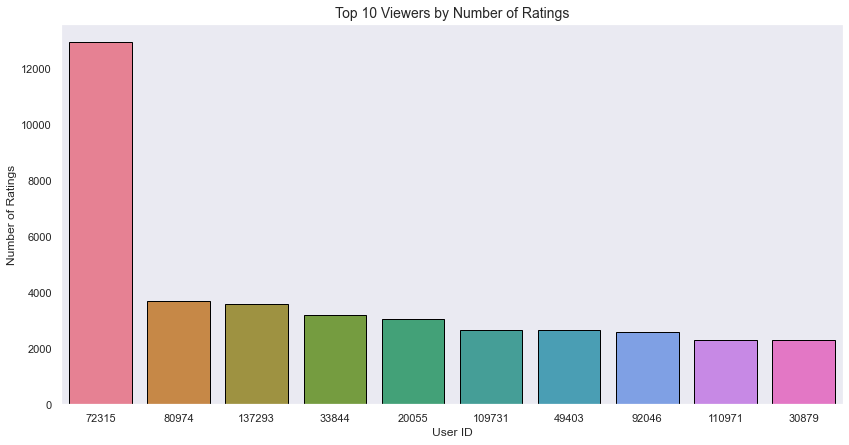

In [23]:
# Define Function that Reveals Users with Top Counts of Ratings
def user_ratings_count(df, n):
    plt.figure(figsize=(14,7))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette="husl", edgecolor="black")
   
    plt.title(f'Top {n} Viewers by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    plt.show()

user_ratings_count(train_df,10)

Our top movie rater(user 72315) has rated over 12,000 movies. It could be that this user rates any movie he/she watches. Or possibly a group of viewers sharing one userID.

Now let us visualise our most rated movies.

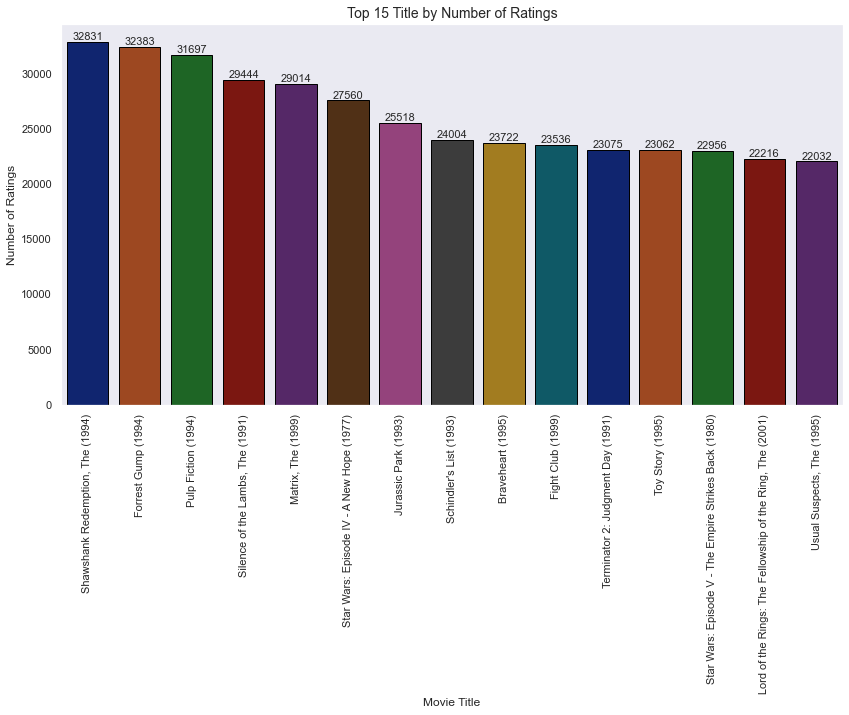

In [24]:
def top_rating_plot(df,column, n):
    plt.figure(figsize=(14,7))
    data = df[str(column)].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, palette='dark', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} {column.title()} by Number of Ratings', fontsize=14)
    plt.xlabel('Movie Title')
    plt.ylabel('Number of Ratings')
    plt.xticks(rotation=90)
    plt.show()

# Call Function to get the top 10
top_rating_plot(train_df,'title',15)

To be honest, it is a big suprise not to see the Titanic movie among the top 15 rated movies. But there are other popular movies like Star Wars, Lord of the Rings, Terminator. 

Let us take a look at the most popular movie genre

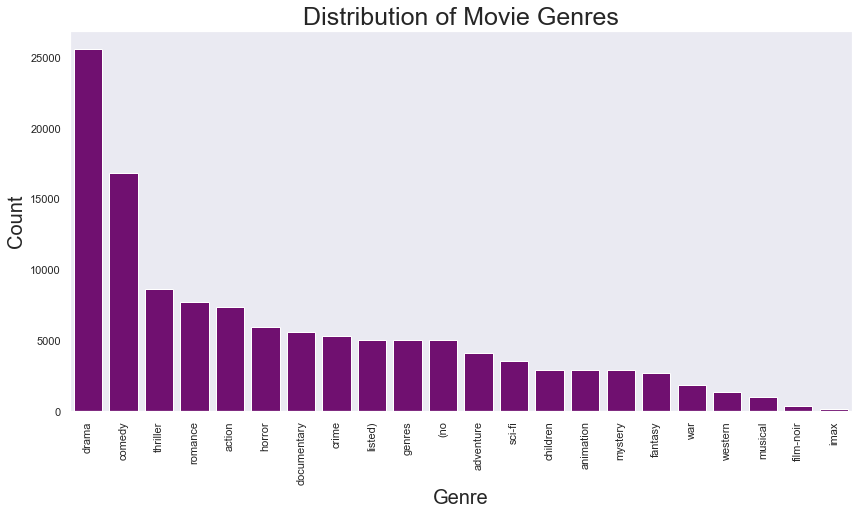

In [36]:
# Getting movies genres from 'genres' column (a movie may have more than one)
movie_genres = pd.DataFrame(movies_df['genres'].str.split(" ").tolist(),
                      index=movies_df['movieId']).stack()
movie_genres = movie_genres.reset_index([0, 'movieId'])
movie_genres.columns = ['movieId', 'Genre']

fig, ax = plt.subplots(figsize=(14, 7))
sns.countplot(x='Genre', data=movie_genres, color='purple',
              order=movie_genres['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Genre', size=20)
plt.ylabel('Count', size=20)
plt.title('Distribution of Movie Genres', size=25)
plt.show()

`Drama` appears to be the most popular genre in our movies dataset.

**Movie Directors, Actors and Actresses**     
Next, we will visualise our popular movie actors and directors in wordcloud.

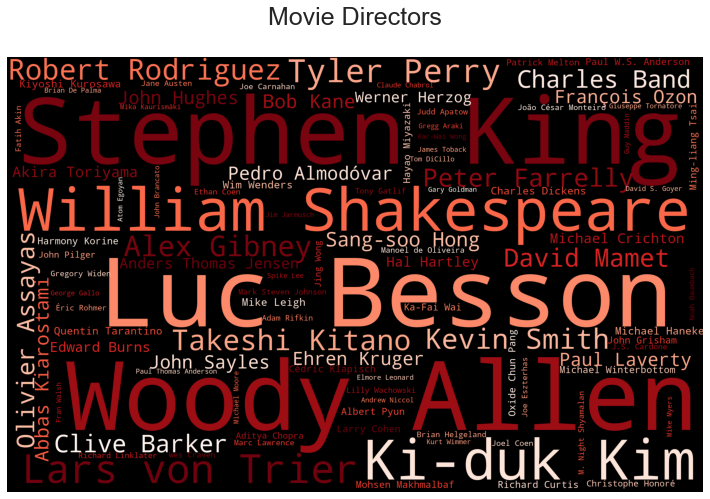

In [26]:
def wordcloud_generator(df, column):  
    keyword_counts = {}
    keyword_pair = []
    words = dict()
    
    # list of words that should be ignored
    ignore = ['nan', ' nan', 'nan ', 'See full summary' ]
    
    # Extract the unique keywords 
    for keyword in [keyword for keyword in df[column] if keyword not in ignore]:
        if keyword in keyword_counts.keys():
            keyword_counts[keyword] += 1
        else:
            keyword_counts[keyword] = 1
     
    # Pair the keywords with their frequencies
    for word,word_freq in keyword_counts.items():
        keyword_pair.append((word,word_freq))
       
    # Sort the keywords accprding to their frequencies
    keyword_pair.sort(key = lambda x: x[1],reverse=True)
    
    # Make it wordcloud-ready
    for s in keyword_pair:
        words[s[0]] = s[1]
        
    # Create a wordcloud using the top 2000 keywords
    wordcloud = WordCloud(width=800, 
                          height=500, 
                          background_color='black', 
                          max_words=100,
                          max_font_size=110,
                          scale=3,
                          random_state=0,
                          colormap='Reds').generate_from_frequencies(words)

    return wordcloud 
# converting 'director' column to string
imdb_df['director'] = imdb_df.director.astype(str)

# Plot wordcloud
directors = wordcloud_generator(imdb_df, 'director')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(directors) 
plt.axis('off') 
plt.title('Movie Directors\n', fontsize=25)
plt.show()

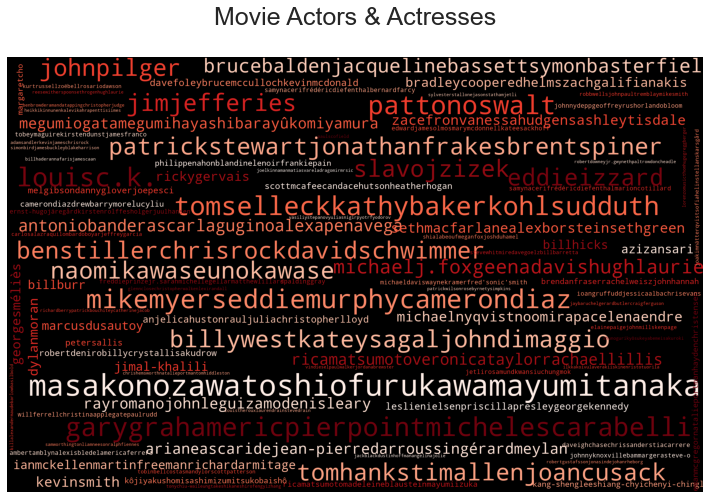

In [28]:
# preparing the title_cast column in imdb_df for word cloud
imdb_df['title_cast'] = imdb_df.title_cast.astype(str)
imdb_df['title_cast'] = imdb_df['title_cast'].apply(lambda x: "".join(x.lower() for x in x.split()))
imdb_df['title_cast'] = imdb_df['title_cast'].map(lambda x: x.split('|')[:3])
imdb_df['title_cast'] = imdb_df['title_cast'].apply(lambda x: " ".join(x))

# Plot wordcloud
actors = wordcloud_generator(imdb_df, 'title_cast')
f = plt.figure(figsize=(20, 8)) 
plt.imshow(actors) 
plt.axis('off') 
plt.title('Movie Actors & Actresses\n', fontsize=25)
plt.show()

**Making use of timestamp for analysis**     
Let us break down the `timestamp` into data and time for further analysis.

In [30]:
#From movie data, convert timestamp to datetime
train_df['date_time'] = train_df['timestamp'].apply(lambda x: datetime.fromtimestamp(x))

# Extracting year, month, day-of-week
train_df['Year'] = train_df['date_time'].dt.year
train_df['Month'] = train_df['date_time'].dt.month
train_df['Day of Week'] = train_df['date_time'].dt.dayofweek

In [31]:
train_df.head()

userId  movieId  rating   timestamp  \
0    5163    57669     4.0  1518349992   
1  106343        5     4.5  1206238739   
2  146790     5459     5.0  1076215539   
3  106362    32296     2.0  1423042565   
4    9041      366     3.0   833375837   

                                               title  \
0                                   In Bruges (2008)   
1                 Father of the Bride Part II (1995)   
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...   
3     Miss Congeniality 2: Armed and Fabulous (2005)   
4  Wes Craven's New Nightmare (Nightmare on Elm S...   

                          genres           date_time  Year  Month  Day of Week  
0    comedy crime drama thriller 2018-02-11 12:53:12  2018      2            6  
1                         comedy 2008-03-23 03:18:59  2008      3            6  
2           action comedy sci-fi 2004-02-08 05:45:39  2004      2            6  
3         adventure comedy crime 2015-02-04 10:36:05  2015      2            2  
4  drama horror mystery thriller 1996-05-29 14:17:17  1996      5            2

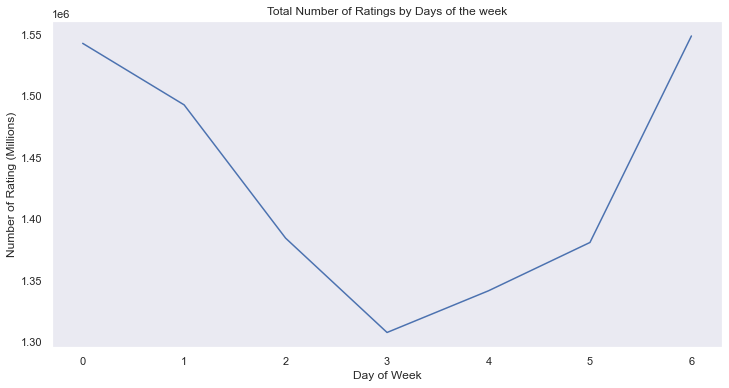

In [33]:
# Ratings by Day-of-Week
dow = train_df.groupby(['Day of Week'])['rating'].count().reset_index()

# creating a line Plot
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(dow['Day of Week'],dow['rating']); plt.xlabel('Day of Week'); 
plt.ylabel('Number of Rating (Millions)'); plt.title('Total Number of Ratings by Days of the week')
plt.show()

This line plot tells us that people mostly view and Rate Movies during the Weekends. Cinemas are quite busy during the weekends.

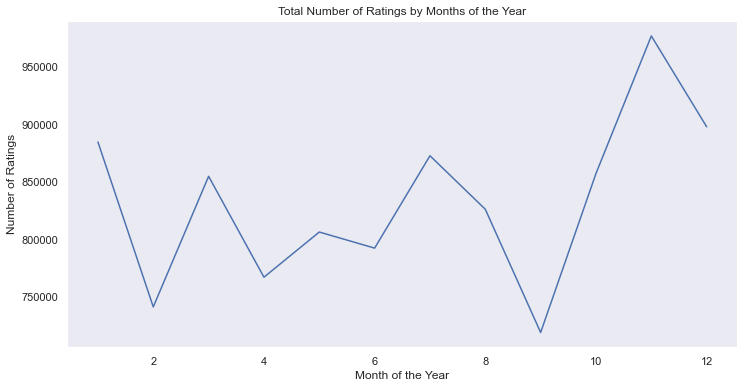

In [34]:
# Group rating by Month
moy = train_df.groupby(['Month'])['rating'].count().reset_index()

# creating a line Plot
fig, (ax) = plt.subplots(ncols=1, figsize=(12,6))
plt.plot(moy['Month'],moy['rating']); plt.xlabel('Month of the Year') 
plt.ylabel('Number of Ratings'); plt.title('Total Number of Ratings by Months of the Year')
plt.show()

It can be said from this plot, that movies were mostly seen during the winter holiday period as well.

In [37]:
gc.collect()

6834

**Best and Worst rated movies.**     
Here, we will create a copy of our `train_df`. We will use this copy to analyse the best and worst rated movies in the train dataset.

In [38]:
# Create a new dataframe from the train_movies dataframe to get the average rating  
copied_train = train_df.copy()

# Drop any duplicated information 
copied_train.drop_duplicates(['title','genres'], inplace = True)

# Get the  avarage rating for each movie in the data 
total_ratings = train_df.groupby(['movieId','genres']).mean()['rating'].reset_index()

# Merge the the copied and the total_ratings to create a new data 
copied_train = copied_train.merge(total_ratings, on = 'movieId')

copied_train.drop(columns=['userId','rating_x','genres_y'],inplace=True) # Delete the duplicated columns

copied_train.rename(columns={'genres_x':'genres','rating_y':'rating'},inplace=True) # Rename the columns

copied_train.head()

movieId   timestamp                                              title  \
0    57669  1518349992                                   In Bruges (2008)   
1        5  1206238739                 Father of the Bride Part II (1995)   
2     5459  1076215539  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...   
3    32296  1423042565     Miss Congeniality 2: Armed and Fabulous (2005)   
4      366   833375837  Wes Craven's New Nightmare (Nightmare on Elm S...   

                          genres           date_time  Year  Month  \
0    comedy crime drama thriller 2018-02-11 12:53:12  2018      2   
1                         comedy 2008-03-23 03:18:59  2008      3   
2           action comedy sci-fi 2004-02-08 05:45:39  2004      2   
3         adventure comedy crime 2015-02-04 10:36:05  2015      2   
4  drama horror mystery thriller 1996-05-29 14:17:17  1996      5   

   Day of Week    rating  
0            6  3.889842  
1            6  3.059165  
2            6  3.004276  
3            2  2.535714  
4            2  2.972609

In [42]:
copied_train.shape

(48203, 9)

In [44]:
# Create a dataframe to check how many times a particular movie has been rated
user_rated = pd.DataFrame(train_df['movieId'].value_counts().reset_index()) 

user_rated.rename(columns = {'index':'movieId','movieId':'voted'},inplace = True) # Rename the columns 

copied_train = copied_train.merge(user_rated, on ='movieId') # Combine the train3 dataset with the User_rated data

# Filter the data 
copied_train = copied_train[copied_train['voted'] > 20] # Find the movies which have the us voted for more than 20

copied_train = copied_train.sort_values('rating',ascending=False) # Sort the values by the rating feature

copied_train.head()

KeyError: 'voted'

This dataframe was created to select those movies that were rated at least more than 5 times. A movie that is rated 5.0 just once or twice doesnt mean it is the best rated movie.

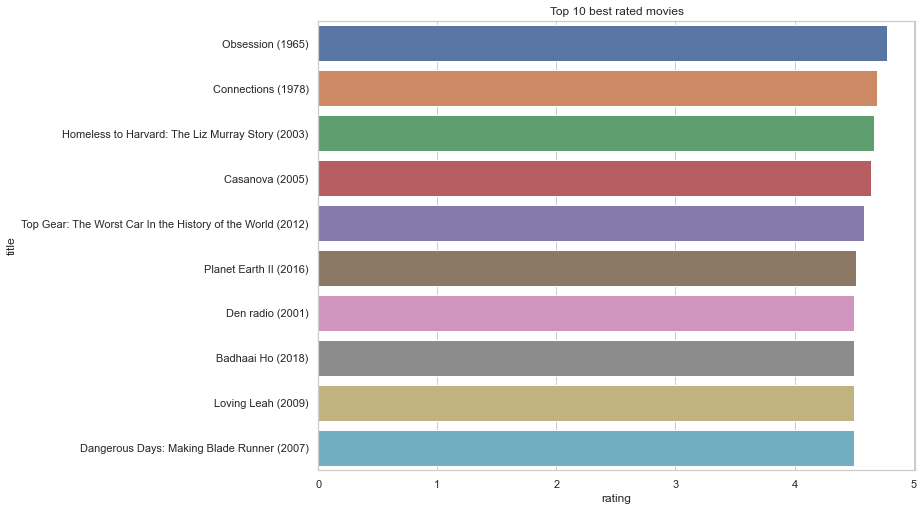

In [59]:
sns.set(style="whitegrid", rc={'figure.figsize':(10.7,8.27)})
sns.barplot(x=copied_train.rating.head(10), y=copied_train.title.head(10))
sns.color_palette()
plt.title('Top 10 best rated movies');

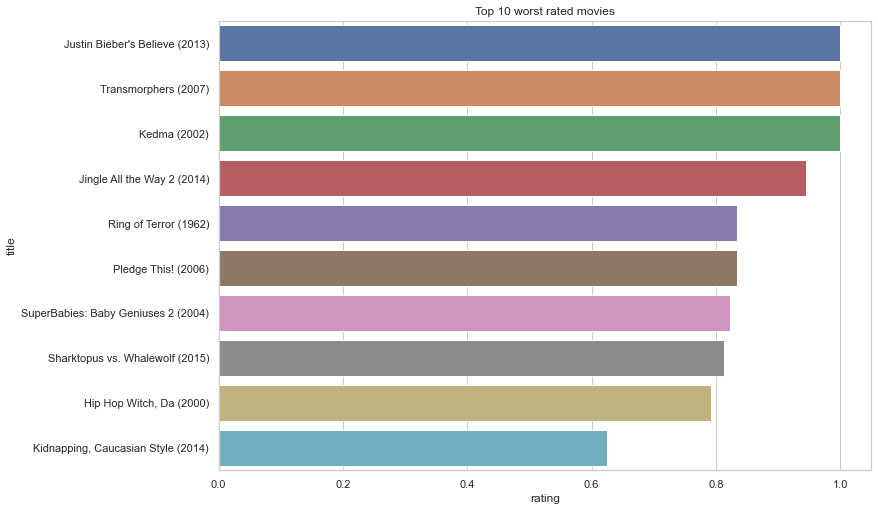

In [58]:
sns.set(style="whitegrid", rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x=copied_train.rating.tail(10), y=copied_train.title.tail(10))
sns.color_palette()
plt.title('Top 10 worst rated movies');

**Rating count by Year interval**     
If we take a look at our visualizations so far, some of these movies were released in the 19th/20th century. Were these movies rated then? Let us find out by visualizing the rating count by year intervals.

In [62]:
def get_year_intervals():
    century = 0
    decade_1 = 0
    decade_2 = 0
    decade_3 = 0
    decade_4 = 0
    decade_5 = 0
    decade_6 = 0
    decade_7 = 0
    decade_8 = 0
    decade_9 = 0
    decade_10 = 0
    decade_11 = 0
    decade_12 = 0
    decade_13 = 0
    counts = []
    # Create a for loop access every row we can divide the data accordingly.
    for i in range(len(copied_train)) :
        if (copied_train.loc[i,'Year'] >= 1800 and copied_train.loc[i,'Year'] < 1900):
            century = century + 1
        elif (copied_train.loc[i,'Year'] >= 1900 and copied_train.loc[i,'Year'] < 1910):
            decade_1 = decade_1 +1
        elif (copied_train.loc[i,'Year'] >= 1910 and copied_train.loc[i,'Year'] < 1920):
            decade_2 = decade_2 + 1
        elif (copied_train.loc[i,'Year'] >= 1920 and copied_train.loc[i,'Year'] < 1930):
            decade_3 = decade_3 + 1
        elif (copied_train.loc[i,'Year'] >= 1930 and copied_train.loc[i,'Year'] < 1940):
            decade_4 = decade_4 + 1
        elif (copied_train.loc[i,'Year'] >= 1940 and copied_train.loc[i,'Year'] < 1950):
            decade_5 = decade_5 + 1
        elif (copied_train.loc[i,'Year'] >= 1950 and copied_train.loc[i,'Year'] < 1960):
            decade_6 = decade_6 + 1
        elif (copied_train.loc[i,'Year'] >= 1960 and copied_train.loc[i,'Year'] < 1970):
            decade_7 = decade_7 + 1
        elif (copied_train.loc[i,'Year'] >= 1970 and copied_train.loc[i,'Year'] < 1980):
            decade_8 = decade_8 + 1
        elif (copied_train.loc[i,'Year'] >= 1980 and copied_train.loc[i,'Year'] < 1990):
            decade_9 = decade_9 +1
        elif (copied_train.loc[i,'Year'] >= 1990 and copied_train.loc[i,'Year'] < 2000):
            decade_10 = decade_10 +1
        elif (copied_train.loc[i,'Year'] >= 2000 and copied_train.loc[i,'Year'] < 2010):
            decade_11 = decade_11 +1
        elif (copied_train.loc[i,'Year'] >= 2010 and copied_train.loc[i,'Year'] < 2020):
            decade_12 = decade_12 +1
        else:
            decade_13 = decade_13 + 1
    #counts.extend([count1,count11])
    counts.extend([century,decade_1,decade_2,decade_3,decade_4,
                   decade_5,decade_6,decade_7,decade_8,decade_9,
                  decade_10,decade_11,decade_12,decade_13])
    return counts

counts = get_year_intervals()

In [63]:
year_interval  = ['1800 - 1899',
                  '1900 - 1909',
                  '1910 - 1919',
                  '1920 - 1929',
                  '1930 - 1939',
                  '1940 - 1949',
                  '1950 - 1959',
                  '1960 - 1969',
                  '1970 - 1979',
                  '1980 - 1989',
                  '1990 - 1999',
                  '2000 - 2009',
                  '2010 - 2019',
                  '2020 - present']

counts_dict = {'Decades':year_interval,
                'count':counts}
counts_df = pd.DataFrame(counts_dict)
counts_df 

Decades  count
0      1800 - 1899      0
1      1900 - 1909      0
2      1910 - 1919      0
3      1920 - 1929      0
4      1930 - 1939      0
5      1940 - 1949      0
6      1950 - 1959      0
7      1960 - 1969      0
8      1970 - 1979      0
9      1980 - 1989      0
10     1990 - 1999    924
11     2000 - 2009   6480
12     2010 - 2019  13796
13  2020 - present      0

C:\Users\PANDORA\AppData\Local\Temp/ipykernel_18404/2451533934.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(year_interval,rotation = 20, ha="right")


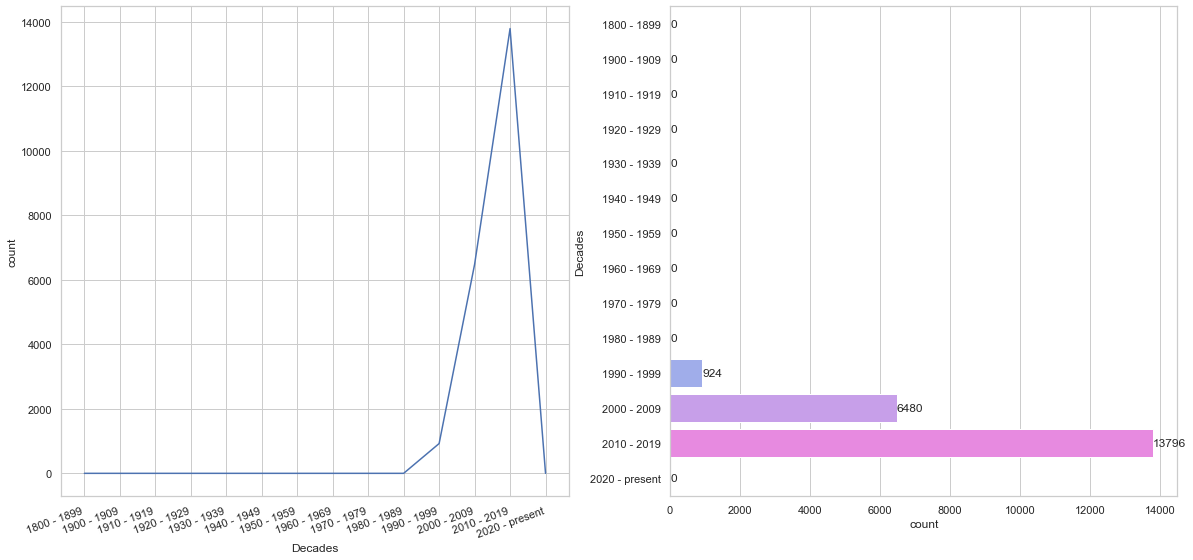

In [79]:
# Plotting the graph
fig, ax = plt.subplots(1,2,figsize=(20, 9)) 

# Create a lineplot to visualise the trend per 10 year period
sns.lineplot(ax=ax[0], x='Decades', y='count',data=counts_df)

# Fix x tick labels for readability  
ax[0].set_xticklabels(year_interval,rotation = 20, ha="right")

# Create a barplot to visualise the how many movies were released per 10 year period 
sns.barplot(ax=ax[1], y='Decades', x='count', data=counts_df)
# Labeling the bars on the bar plot
for container in ax[1].containers:
    ax[1].bar_label(container)

# Show the barplot
plt.show()

Alright. the dataframe and visualization above has made it clear. These movies wer being rated starting from the 1990s. And so far, there are no movies recorded here from 2020 to present.

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In this stage of our predict project, we will;
- Droping some features from our train_df.
- Extracting a sample from our train_df.
- perform text vectorization (Tf-Idf precisely) on our 'genre' feature.

In [80]:
train_df.head()

userId  movieId  rating   timestamp  \
0    5163    57669     4.0  1518349992   
1  106343        5     4.5  1206238739   
2  146790     5459     5.0  1076215539   
3  106362    32296     2.0  1423042565   
4    9041      366     3.0   833375837   

                                               title  \
0                                   In Bruges (2008)   
1                 Father of the Bride Part II (1995)   
2  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...   
3     Miss Congeniality 2: Armed and Fabulous (2005)   
4  Wes Craven's New Nightmare (Nightmare on Elm S...   

                          genres           date_time  Year  Month  Day of Week  
0    comedy crime drama thriller 2018-02-11 12:53:12  2018      2            6  
1                         comedy 2008-03-23 03:18:59  2008      3            6  
2           action comedy sci-fi 2004-02-08 05:45:39  2004      2            6  
3         adventure comedy crime 2015-02-04 10:36:05  2015      2            2  
4  drama horror mystery thriller 1996-05-29 14:17:17  1996      5            2

Since we are done with our analysis, Let us remove some columns we dont need anymore from the train dataset to save memory.

In [81]:
# Removing columns in train_df
train_df.drop(columns=['date_time', 'Year', 'Month', 
                       'Day of Week', 'timestamp'], inplace=True)

In [82]:
train_df.shape

(10000038, 5)

In [83]:
gc.collect()

2061129

Computing with millions of datasets on this local machine can cause it to freeze or crash. Therefore, we will be taking and working with samples from our datasets in order to avoid funny stories. But we can later try training our models with the whole train_df to see if it all goes well. Training a model with a lot of data realy helps to improve a model.

### Content-based Filtering

filtering based on `genre`.

In [ ]:
# Convienient indexes to map between book titles and indexes of 
# the books dataframe
titles = movies_df['title']
indices = pd.Series(movies_df.index, index=movies_df['title'])

indices.head()

Due to the capacity of this local machine, We will take a sample from `movies_df`to build our recommendation system. This is to avoid system freezing or crashing while running codes.

#### vectorizating our new feature

In [ ]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,2),
                     min_df=0, stop_words='english')

# Produce a feature matrix, where each row corresponds to a movie,
# with TF-IDF features as columns 
sample_genres_vect = tf.fit_transform(movies_df['genres'].head(21000))
#sample_genres_vect = tf.fit_transform(movies_df['genres'])    <-- Uncomment this if running on Higher computing 
#power such as AWS EC2 instance
sample_genres_vect.shape

Let us check the similarity between each vector within our matrix. This is done by making use of the `cosine_similarity` function.

In [ ]:
cosine_sim_content = cosine_similarity(sample_genres_vect, sample_genres_vect)
print (cosine_sim_content.shape)

In [ ]:
cosine_sim_content[:5]

Now, we will create an algorithm that will recommend similar movies for a user based on content.

In [ ]:
def content_generate_top_N_recommendations(movie_title, N=10):
    # Convert the string book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    # Extract all similarity values computed with the reference book title
    sim_scores = list(enumerate(cosine_sim_content[b_idx]))
    # Sort the values, keeping a copy of the original index of each value
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Select the top-N values for recommendation
    sim_scores = sim_scores[1:N]
    # Collect indexes 
    movie_indices = [i[0] for i in sim_scores]
    # Convert the indexes back into titles 
    return titles.iloc[movie_indices]

In [ ]:
content_generate_top_N_recommendations("Toy Story (1995)", N=10)

In [ ]:
content_generate_top_N_recommendations("Wolf (1994)", N=10)

#### Rating Prediction  
We will create a function that will implement this algorithmic process.

In [ ]:
def content_generate_rating_estimate(movie_title, user, rating_data, k=20, threshold=0.0):
    # Convert the book title to a numeric index for our 
    # similarity matrix
    b_idx = indices[movie_title]
    neighbors = [] # <-- Stores our collection of similarity values 
     
    # Gather the similarity ratings between each book the user has rated
    # and the reference book 
    for index, row in rating_data[rating_data['userId']==user].iterrows():
        sim = vect_cos_sim[b_idx-1, indices[row['title']]-1]
        neighbors.append((sim, row['rating']))
    # Select the top-N values from our collection
    k_neighbors = heapq.nlargest(k, neighbors, key=lambda t: t[0])

    # Compute the weighted average using similarity scores and 
    # user item ratings. 
    simTotal, weightedSum = 0, 0
    for (simScore, rating) in k_neighbors:
        # Ensure that similarity ratings are above a given threshold
        if (simScore > threshold):
            simTotal += simScore
            weightedSum += simScore * rating
    try:
        predictedRating = weightedSum / simTotal
    except ZeroDivisionError:
        # Cold-start problem - No ratings given by user. 
        # We use the average rating for the reference item as a proxy in this case 
        predictedRating = np.mean(rating_data[rating_data['title']==movie_title]['rating'])
    return predictedRating

In [ ]:
# Subset of ratings from user 1000
train_df[train_df['userId'] == 1000][3:10]

Generating prediction from an already rated movie by user 1000

In [ ]:
title = "Sixteen Candles (1984)"
actual_rating = train_df[(train_df['userId'] == 1000) & (train_df['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=1000, rating_data=train_df)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

In [ ]:
title = "Lost Highway (1997)"
actual_rating = train_df[(train_df['userId'] == 1000) & (train_df['title'] == title)]['rating'].values[0]
pred_rating = content_generate_rating_estimate(movie_title=title, user=1000, rating_data=train_df)
print (f"Title - {title}")
print ("---")
print (f"Actual rating: \t\t {actual_rating}")
print (f"Predicted rating: \t {pred_rating}")

In [ ]:
gc.collect()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


#### Here in Model Building, we will:
- Build a base model(with Logistic Regression) using the train data.

- Build other models like KNearest Neighbours(KNN), Support Vector Machines (SVM), Decision Trees, AdaBoost, Random Forest, Naive Bayes, LDA/QDA and Neural Network that will help us in our aim of achieving a high `F1-score`

### Base Model     
The `Logistic Regression` will be our base model. Then, we will iterate through other models to see if we can achieve a higher `F1-score` than our base model. Aiming for 1.0 `F1-score` is not a bad idea at all.

In this secttion of our project, we will visualize the the performance of our models based on the following metrics:   
- Accuracy score
- Precision score
- Recall score
- F1 score       
And as well as;     
- Train time

This is how these matrics are calculated.    

#### Precision

When it predicts _yes_, how often is it correct? 

$$ Precision = \frac{sum of \space TPs}{sum of \space TPs \space + sum of FPs}  $$


#### Recall

When the outcome is actually _yes_, how often do we predict it as such?

$$ Recall = \frac{Sum of \space TPs}{sum of \space TPs \space + sum of \space FNs} $$


#### F1 Score

Weighted average of precision and recall. 

$$F_1 = 2 \times \frac {Precision \space \times \space Recall }{Precision \space + \space Recall }$$

### Evaluation of our chosen models

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## The best model and why it is the best choice

We built nine models and based on our selection criteria, we arrived at the best performing models. 
Below are some important insights:

 - Linear SVC and Logistic Regression models performed similarly as observed by the accuracy score and the F1-Score.
 - **Logistic Regression Model** performed best by a very slight margin. 

We can therefore conclude that `Logistic Regression` is the best model to use for prediction of `Sentiment`.

However, we will continue optimizing both models for best results.

## Predicting the Sentiments with the test set on Kaggle

We do not neccessarily have to go through Data Preprocessing and Engineering all over again for the given test dataset; let us create a function that will easily do the job for us.

In [ ]:
# create a function to use in cleaning the test data

def wrangle_data(filepath):
    # Read csv file into dataframe 
    tweeter_df = pd.read_csv(filepath)
    
    # create new features
    # convert message column to lower case
    tweeter_df['message_tweet'] = tweeter_df['message'].str.lower()  
    tweeter_df.head(5)
    
    # replacing all with the text 'webpage'
    pattern_url = r'((www\.[^\s]+)|(https?://[^\s]+))+'
    subs_url = r'webpage'
    tweeter_df['message_tweet'] = tweeter_df['message_tweet'].replace(to_replace = pattern_url, value = subs_url, regex = True)
    
    # creating a function to remove punctuations
    def remove_punctuation(tweet):
        return ''.join([l for l in tweet if l not in string.punctuation])
    tweeter_df['message_tweet'] = tweeter_df['message_tweet'].apply(remove_punctuation)
    
    # Remove stop words from tweets
    stop_words = set(stopwords.words('english'))
    tweeter_df['message_tweet'] = tweeter_df['message_tweet'].apply(lambda x: ' '.join(
    word for word in x.split() if word not in stop_words))
    
    # Initialize word tokenizer
    tokeniser = TreebankWordTokenizer()
    tweeter_df['tokenized_message_tweet'] = tweeter_df['message_tweet'].apply(tokeniser.tokenize)
    
    # activating stemmer 
    stemmer = SnowballStemmer('english')
    def message_stemmer(words, stemmer): # defining a function for stemming
        return [stemmer.stem(word) for word in words]
    
    tweeter_df['stemmatized_message_tweet'] = tweeter_df['tokenized_message_tweet'].apply(message_stemmer, args=(stemmer, ))
    
    # Selected Independent feature of our dataset.
    X = tweeter_df['message']
    
    # Transforming our train set.
    X_transformed = vectoriser.transform(X)
    
    return X_transformed

The different features we created gave us different F1-score after vectorizing and training. But we selected the feature that has given us a better F1-score so far. The fine-tuning and optimization will not end here. We will keep tweaking to achieve higher f1 score. 

In [ ]:
X_unseen_test = wrangle_data("test_with_no_labels.csv")

In [ ]:
X_unseen_test.shape

In [ ]:
# Predicting the test set with no label
lsvc_pred = LinearSVC_Osample.predict(X_unseen_test)
lr_pred = LR_Osample.predict(X_unseen_test)
lsvm_pred = Linear_SVM_Osample.predict(X_unseen_test)

In [ ]:
# Selecting the index of the test dataframe.
test_set = pd.read_csv('test_with_no_labels.csv')
# Making the tweetid to be the index.
test_set = test_set.set_index('tweetid')
test_set = test_set.index

In [ ]:
# setting the text index and predicted sentiment into a dataframe
test_data = {'tweetid': test_set, 'sentiment':np.round(lsvc_pred, 0)}
test_with_pred_label = pd.DataFrame(data=test_data)
test_with_pred_label = test_with_pred_label[['tweetid', 'sentiment']]
test_with_pred_label.head(5)

In [ ]:
# converting the dataframe csv file
test_with_pred_label.to_csv("Test_Submission.csv",index  = False)

In [ ]:
model_save_path = "CVZER.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(vectoriser,file)

### Saving our models to be used for Streamlit

In [ ]:
model_save_path = "LSVC.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(LinearSVC_Osample,file)

<a id="eight"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

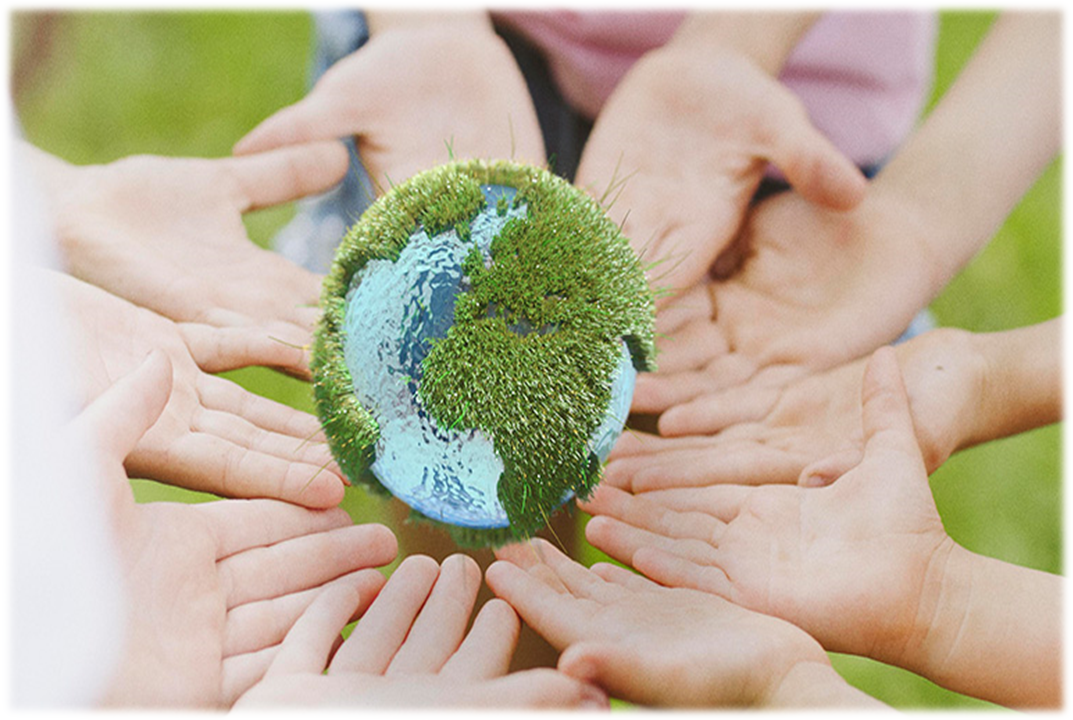

As professional data scientists, we have successfully developed a model that will assist in predicting the sentiments of message tweets or any comment concerning climate change.

The Linear SVC emerged to be the best model with an F1-score of over 0.70. This will assist in companies' access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

We therefore recommend that these companies should:

- Always attach the importance of recycling on every of their product. If possible, add footprint reports of the products that they produce.

- Encouraging customers to take a survey on the company’s website. They can gather the data from these customers' survey into a csv file process and predict their sentiment. With this, the companies will know how to package and deliver goods to their different kind  of customers and different kind of locations.

- Avoid over-packaging of their products so as to generate less garbage.

- Create more company branches, mostly in geographical areas where people believe in climate change(like the `Pros`). It can reduce the greenhouse gases generated in logistics. 

- Creating long-lasting products; this will contribute to the growing green movement while staying inexpensive and attractive to customers.

- Pledge to invest in clean energy.

- Ensure to Supply and use electricity only from renewable energy sources most especially in the `Pro` areas.

Simply put, a recommender system functions by predicting a user's rating or preference for an item. This allows a service provider to build up a catalog of items which it believes the user will want to examine - thereby increasing their engagement with the service and allowing a wider array of content to be considered.

In [ ]:
# Saving each metric to add to a dictionary for logging
f1_linsvc = f1_score(y_test, OS_linsvc_pred, average='weighted')
f1_logreg = f1_score(y_test, OS_LR_pred, average='weighted')
f1_linsvm = f1_score(y_test, OS_Linear_SVM_pred, average='weighted')


# Create dictionaries for the data we want to log for comet
params = {"random_state": 30,
          "model_type": "LinearSVC_Osample",
          "stratify": True
          }
metrics = {"f1 lrm": f1_logreg,
           "f1 lsvc": f1_linsvc,
           "f1 lsvm": f1_linsvm,
           }

In [ ]:
# Log our parameters and results
experiment.log_parameters(params)
experiment.log_metrics(metrics)

In [ ]:
experiment.end()

## References

- Explore Athena Trains
- Geeksforgeeks
- Datacamp
- Towardsdatascience
- Google
- Stack overflow